<h1 style = 'color : blue', align = 'center'><u>Scraping Top Repositories for Topics on GitHub</u></h1>

<h3 style = 'color : red',><u>Web Scraping</u></h3>

*Web scraping is the process of using bots to extract data from websites, such as HTML code and database information. The goal is to process the information into a simple structure, like a spreadsheet, CSV file, or database.* *Web scraping can be useful for many disciplines, including data science, business intelligence, and investigative reporting. For example, companies can use web scraping to collect data from social media to understand how consumers feel about their products.* *Web scraping software can access the internet using a web browser or the Hypertext Transfer Protocol (HTTP). When using a browser, you can right-click and inspect a page to see how on-page elements correspond to lines of HTML code. This can help you determine what to scrape.*


![Example Image](Types-of-web-data.png)>


**Here are some steps for web scraping using Python:**

*1. Import the html module from lxml and the requests module for sending HTTP requests.*

*2. Define the URL of the website you want to scrape.*

*3. Use the requests.get() function to send an HTTP GET request to the website and retrieve the HTML content.*

*4. Convert that HTML content into a parsed document using Beautiful Soup by first converting the content into a text file by using .text attribute.*

*5. We can now use this parsed document which is a BeautifulSoup object, which represents the parsed document as a tree structure.*

*6. This object allows you to navigate and manipulate the HTML document easily.*

<h3 style = 'color : red',><u>GitHub</u></h3>

* GitHub is a developer platform that allows developers to create, store, manage and share their code. It uses Git software, providing the distributed version control of Git plus access control, bug tracking, software feature requests, task management, continuous integration, and wikis for every project. 

* It is commonly used to host open source software development projects. As of January 2023, GitHub reported having over 100 million developers and more than 420 million repositories, including at least 28 million public repositories. It is the world's largest source code host as of June 2023.

<h3 style = 'color : red',><u>Challenge Overview</u></h3>

* We are going to scrape Github Website (Github Topics in Explore section on Home Page).
* We shall fetch all the topics and along with the Top Repositories from each topic.
* The details that needs to be fetched here are:
  
    * Username
    * Repository Name
    * No. of Stars given to each Repository
    * URL of the Repository


* These details are then needs to be exported(preferably in csv format).dx

<h3 style = 'color : red',><u>Tools Used</u></h3>

* Python
* Requests
* Beautiful Soup
* Pandas

<h3 style = 'color : red',><u>Steps to be Followed</u></h3>

* We will be exploring the various Topics of Github under the **Explore** section of Github (https://github.com).
* We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description.
* For each topic, we'll get the top 20 repositories in the topic from the topic page.
* For each repository, we'll grab the repo name, username, stars and repo URL.
* For each topic we'll create a CSV file in the following format:

![Example Image](Data_format.png)

<h3 style = 'color : red'><u>Scrape the list of topics from Github</u></h3>

* We shall use requests to downlaod the page.
* We shall then use BS4 to parse and extract information.
* All the extracted information will then be converted to a Pandas dataframe.

<h5 style = 'color : red',>Let's write a function to download the page.</h5>

In [2]:
import requests
from bs4 import BeautifulSoup

def get_topics_page():
    # Let's get the URL First
    topics_url = 'https://github.com/topics'
    
    #Download the Page
    response = requests.get(topics_url)

    # Check if our page has been successfully downloaded
    if response.status_code != 200:
        raise Exception(f'Failed to load page {topics_url}')
        
    # Parse using Beautiful soup
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

<h5 style = 'color : red',>We can now call our function get_topics_page to fetch our parsed document from the URL --> 'https://github.com/topics'</h5>

In [4]:
doc = get_topics_page()

##### Let's create some helper functions to parse information from the page. 
To get topic titles, we can pic*k p ta*gs with the clas"f3 lh-condensed mb-0 mt-1 Link--primary"..

![Example Image](Titles_class.png)

<h5 style = 'color : red'>Let's write a function to get the titles from the page.</h5>

In [6]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles
    

##### We have total 168 topics in our topics page. Now since it displays only **30** when we first open the page, we should get **30** topics for now.
##### Let us check that.

In [8]:
topic_titles = get_topic_titles(doc)
print(f'The Number of topics Fetched as of now --> {len(topic_titles)}')

The Number of topics Fetched as of now --> 30


<h5 style = 'color : red'>Now Let's write a function to get all the titles from the page.</h5>

##### For that, we use the approach that involves identifying and directly making the network requests that the webpage uses to load additional content when you click the "Load More" button. Here’s how you can approach it:

****<u>1. Inspect the Webpage's Network Requests:</u>****

When you click "Load More" on the webpage, a request is usually sent to the server to fetch more data. This data is often returned in JSON format or as additional HTML that gets inserted into the page.

You can identify these requests using your browser's Developer Tools:

* Open the webpage in your browser (e.g., Chrome).
* Right-click on the page and select "Inspect" or press Ctrl+Shift+I to open Developer Tools.
* Go to the "Network" tab.
* Click the "Load More" button on the webpage.
* Look for a new network request that appears in the list. It might be an XHR (XMLHttpRequest) request, which is common for AJAX calls.
* Click on the request and examine the "Headers" to find the request URL and parameters, and check the "Response" tab to understand the format of the data being returned.

  
****<u>2. Simulate These Requests Using requests:</u>****
Once you've identified the request URL and any required parameters, you can use Python's requests library to programmatically simulate these requests.


****<u>3. Parse the Response and Extract the Data:</u>****
Depending on whether the server responds with JSON or HTML, you'll need to parse the data accordingly.

***How to Confirm:***

You can confirm whether the response is HTML or JSON by doing the following:

* <u>Inspect the Response in Developer Tools:</u>

    * In your browser's Developer Tools under the "Network" tab, click on the request to https://github.com/topics?page=2.
    * Look at the "Response" tab to see the format of the returned data.
    * If you see HTML tags (e.g., < html >, < div >, < h1 >) the response is HTML.
      
* <u>Programmatically Check the Content-Type Header:</u>

    * You can check the Content-Type header in the response, which indicates the format:
        * text/html: The response is HTML.
        * application/json: The response is JSON.


![Example Image](All_titles.png)

##### Since we have confirmed it to be HTML, we can scrape the titles from this page using requests and BeautifulSoup as follows:

In [179]:
def get_all_topic_titles():

    #Creating an Empty list of all topic titles
    all_titles = []
    
    # Since there are 6 pages
    for page in range(1, 7): 

        # URL for the page of GitHub topics
        url = f'https://github.com/topics?page={page}'

        # Send a GET request to the URL
        response = requests.get(url)

        # Parse the HTML content using BeautifulSoup
        doc = BeautifulSoup(response.text, 'html.parser')
        
        # Find all topic titles (adjust the tag and class based on the actual HTML structure)
        # For example, if the titles are in <p> tags with class 'f3 lh-condensed', you would do:
        titles = doc.find_all("p", class_="f3 lh-condensed mb-0 mt-1 Link--primary")  # Adjust the tag and class

        #Adding the titles in the list by fetching the text from them using titles.text and
        #Removing extra spaces (if any) using .strip() method.
        for title in titles:
            all_titles.append(title.text.strip())

    return all_titles

In [66]:
all_titles = get_all_topic_titles()

In [68]:
len(all_titles)

168

##### We have now got all our **168** titles!

<h5 style = 'color : red'>Similarly now let's write a function to get the descriptions and URLs.</h5>

In [116]:
def get_topic_desc():

    #Creating an Empty list of all topic descriptions.
    all_descriptions = []
    
    # Since there are 6 pages
    for page in range(1, 7): 

        # URL for the page of GitHub topics
        url = f'https://github.com/topics?page={page}'

        response = requests.get(url)
        
        doc = BeautifulSoup(response.text, 'html.parser')
        
        # Find all topic titles (adjust the tag and class based on the actual HTML structure)
        # For example, if the titles are in <p> tags with class 'f3 lh-condensed', you would do:
        descs = doc.find_all("p", {'class' :"f5 color-fg-muted mb-0 mt-1"})  # Adjust the tag and class

        #Adding the titles in the list by fetching the text from them using titles.text and
        #Removing extra spaces (if any) using .strip() method.
        for desc in descs:
            all_descriptions.append(desc.text.strip())

    return all_descriptions
    

![Example Image](Desc_class.png)

In [125]:
all_descriptions = get_topic_desc()
print(f'The Total Descriptions are --> {len(all_descriptions)}')

The Total Descriptions are --> 168


#### For URLs:

In [167]:
def get_topic_urls():

    #Creating an Empty list of all topic descriptions.
    all_urls = []
    
    # Since there are 6 pages
    for page in range(1, 7): 

        # URL for the page of GitHub topics
        url = f'https://github.com/topics?page={page}'

        response = requests.get(url)
        
        doc = BeautifulSoup(response.text, 'html.parser')
        
        # Find all topic titles (adjust the tag and class based on the actual HTML structure)
        # For example, if the titles are in <p> tags with class 'f3 lh-condensed', you would do:
        urls = doc.find_all("a", {'class' :"no-underline flex-1 d-flex flex-column"})  # Adjust the tag and class

        #Adding the titles in the list by fetching the text from them using titles.text and
        #Removing extra spaces (if any) using .strip() method.
        for url in urls:
            all_urls.append(url)

    return all_urls

![Example Image](url_class.png)

In [169]:
all_urls = get_topic_urls()
len(all_urls)

168

##### We have got all our 168 URLs. Now, let's have a look at one of these URLs

In [171]:
#Printing the first URL
print(all_urls[0])

<a class="no-underline flex-1 d-flex flex-column" href="/topics/3d">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-fg-muted mb-0 mt-1">
          3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
        </p>
</a>


##### We can see that this is not our desired result. Also our URL lies in the **href** attribute of our output. Lets now fetch this 
##### attribute and combine it with <u>**https://github.com**</u> to get the complete URL. 

##### <u>Let's achieve this by using a List Comprehension</u>

In [173]:
# Iterate over the all_urls list to fetch the 'href' attribute and combine it with our base url i.e, https://github.com
base_url = 'https://github.com'
all_urls = [base_url + all_urls[url]['href'] for url  in range(len(all_urls))]

#Lets print the first 5 urls
print(all_urls[:5])

['https://github.com/topics/3d', 'https://github.com/topics/ajax', 'https://github.com/topics/algorithm', 'https://github.com/topics/amphp', 'https://github.com/topics/android']


##### We have now our list of all the URLs for all the Topics

<h5 style = 'color : red'>Let's put this all together into a single function</h5>

In [195]:
def scrape_topics():
    
    for page in range(1, 7): 

        # URL for the page of GitHub topics
        url = f'https://github.com/topics?page={page}'

        response = requests.get(url)

        if response.status_code != 200:
            raise Exception('Failed to load page {}'.format(topic_url))
        
        doc = BeautifulSoup(response.text, 'html.parser')

        #Let's Create a topic Dictionary to hold the Title, Description and URL.
        topics_dict = {
            
            'title': get_all_topic_titles(),
            'description': get_topic_desc(),
            'url': all_urls
    }

    #This should return the data in a Dataframe for which we shall first import pandas library and use DataFrame method to create the dataframe.
    import pandas as pd
    return pd.DataFrame(topics_dict)

In [197]:
#Let's call the scrape_topics() function to create our Dataframe.
topics_df = scrape_topics()

In [203]:
#Display the topics_df
topics_df

,title,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
...,...,...,...
163,Unity,Unity is a game engine used to create 2D/3D vi...,https://github.com/topics/unity
164,Unreal Engine,"Unreal Engine is used to create awesome games,...",https://github.com/topics/unreal-engine
165,Vagrant,Vagrant is an open-source software product for...,https://github.com/topics/vagrant
166,Vim,Vim is a console-run text editor program.,https://github.com/topics/vim


<h3 style = 'color : red'><u>Get the top 20 repositories from a topic page</u></h3>

#### We shall now scrape the top 20 repositories from each topic according to the number of stars given to them.

![image.png](stars.png)

##### Steps to be followed:

* We first find the class corresponding to the Repository Name, Username, Repository URL and Number of Stars in order to fetch the required information.
* We will use our function to get the list of topics from the topics page.
* We will then define the functions which will help us to create a csv file for scraped repositories from the topics page.
* Finally we shall define our main or ultimate function by putting them all together.

##### Let's start with the function which will help us to download the page containing top Repositories from the URL of a topic.

In [208]:
def get_topic_page(topic_url):
    
    # Download the page
    response = requests.get(topic_url)
    
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
        
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    
    return topic_doc

In [210]:
#Let us test our function by fetching the parsed document from the *3D* Topics page by giving the URL *https://github.com/topics/3d*
doc = get_topic_page('https://github.com/topics/3d')

![Example Image](h3_tag.png)

##### We can observe that the information regarding the Repository Name, Username and Repository URL lies in the 
##### corresponding <u>**a**</u> tags of the parent <u>**H3**</u> tag.

##### <u>Let us fetch the H3 tags by defining a function.</u>

In [270]:
def get_h3_tag(doc):

    #Class corresponding to the H3_tag
    selection_class = "f3 color-fg-muted text-normal lh-condensed"
    
    h3_tags = doc.find_all('h3', {'class' : selection_class})

    return h3_tags

In [246]:
#Let's test our function:
h3_tags = get_h1_tag(doc)

#let's print the first tag:
print(h3_tags[0])

<h3 class="f3 color-fg-muted text-normal lh-condensed">
<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="c72fbd5c69a8ee7c9c53a4e65de2b93c8fc7552dd793945819639bc165c0f0ba" data-turbo="false" data-view-component="true" href="/mrdoob">
            mrdoob
</a>          /
          <a class="Link text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4a2667db3d63a1739c412e059e5da95afe419df83f70949b5d59dc3478f5c79a" data-turbo="false" data-view-component="true" href

##### Similary, Let us fetch the Star tags by defining a function.

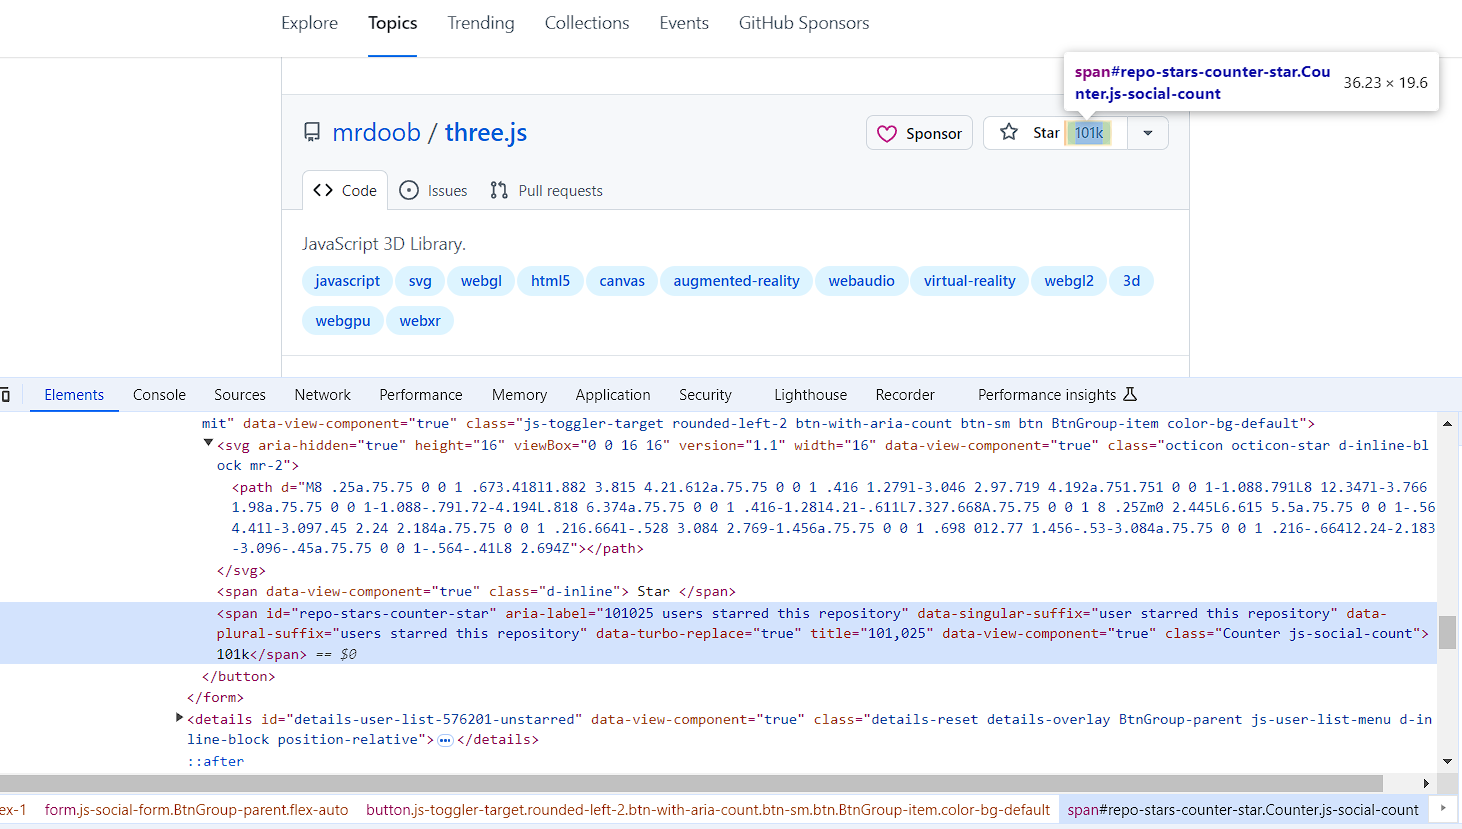

In [248]:
def get_star_tag(doc):

    #Class corresponding to the <span> tag containing the star count
    selection_class = "Counter js-social-count"
    
    star_tags = doc.find_all('span', {'class' : selection_class})

    return star_tags

In [252]:
#Let's test our function:
star_tags = get_star_tag(doc)

#let's print the first tag:
print(star_tags[0].text)

101k


##### We can see that we are getting the star count as a string. Hence, let us write a funtion to convert that into integer.

In [256]:
def parse_star_count(stars):

    #Let's first remove extra spaces to avoid any errors.
    stars = stars.strip()

    #Condition to check if the count is in thousands
    if stars[-1] == 'k':
        return int(float(stars[:-1])*1000)
        
    return(int(stars))

In [260]:
#Let's test our function:
stars = parse_star_count(star_tags[0].text)

#let's print the count of the stars in the first star tag:
print(stars)

101000


#### Now we shall define a function which takes the necessary tags as arguments and returns all the necessary information about a Repository.

In [298]:
def get_repo_info(h3_tags, star_tags):
# returns all the required info about a repository
    
    a_tags = h3_tags.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  base_url + a_tags[1]['href']
    stars = parse_star_count(star_tags.text.strip())
    return username, repo_name, stars, repo_url

##### We shall now define a function that takes the parsed document and returns a pandas Dataframe with all the information about a Repository.

In [302]:
def get_topic_repos(doc):
    # Get the h3 tags containing repo title, repo URL and username
    h3_tags = get_h3_tag(doc)

    # Get star tags
    star_tags = get_star_tag(doc)
    
    topic_repos_dict = { 'username': [], 'repo_name': [], 'stars': [],'repo_url': []}

    # Get repo info
    for i in range(len(h3_tags)):
        repo_info = get_repo_info(h3_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])

    import pandas as pd
    return pd.DataFrame(topic_repos_dict)

In [304]:
#Let's call our function to get the pandas Dataframe.
topics_repos_df = get_topic_repos(doc)

In [306]:
#Display the Dataframe to check if we have got the desired result.
topics_repos_df

,username,repo_name,stars,repo_url
0,mrdoob,three.js,101000,https://github.com/mrdoob/three.js
1,pmndrs,react-three-fiber,26900,https://github.com/pmndrs/react-three-fiber
2,libgdx,libgdx,23100,https://github.com/libgdx/libgdx
3,BabylonJS,Babylon.js,22900,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,20000,https://github.com/ssloy/tinyrenderer
5,FreeCAD,FreeCAD,18500,https://github.com/FreeCAD/FreeCAD
6,lettier,3d-game-shaders-for-beginners,17600,https://github.com/lettier/3d-game-shaders-for...
7,aframevr,aframe,16500,https://github.com/aframevr/aframe
8,CesiumGS,cesium,12500,https://github.com/CesiumGS/cesium
9,blender,blender,12500,https://github.com/blender/blender


#### Now that we have functions which can get all the information about all the topics and all the corresponding Top Repositories,
#### We will now define a function which will export all our required information in csv format.

In [313]:
def scrape_topic(topic_url, path):

    import os
    #Importing os package to manage files, file paths and directories.

    #Condition to check if the file already exists.
    if os.path.exists(path):
        print(f'The file {path} already exists. Skipping...')

    #Get the Topics Dataframe.
    topic_df = get_topic_repos(doc)
    
    #Exporting the Dataframe to a csv file.
    topic_df.to_csv(path, index = None)

<h3 style = 'color :red'><u>Putting it all together</u></h3>

* We have a funciton to get the list of topics.
* We have a function to create a CSV file for scraped repos from a topics page.
* We shall also create a new Directory(Folder) to store all the csv files corresponding to the Top Repositories from a single topic.
* Let's create a function to put them together.

In [327]:
def scrape_topics_repos():

    #lets start our function by printing this statement
    print('Scraping list of topics')

    #Call our function to get the topics
    topics_df = scrape_topics()

    #Importing os package to manage files, file paths and directories.
    import os
    
    #Making a new folder named 'Repo_csv_data'
    directory = 'Repo_csv_data'
    os.mkdir(directory)

    #Iterating through rows of our topics dataframe to get the title and Url.
    for index, row in topics_df.iterrows():

        #Let's print this statement to mark the beginning of the proccess.
        print(f'Scraping top repositories for --> {row['title']}')

        #finally, let's call our fucntion which will take the title and url from the topics dataframe and export the information into the csv format.
        scrape_topic(row['url'], f'Repo_csv_data/{row['title']}.csv')

##### Finally let's test our fucntion to check if we can get a folder containing our required csv files with top Repositories from each topic.

In [329]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for --> 3D
Scraping top repositories for --> Ajax
Scraping top repositories for --> Algorithm
Scraping top repositories for --> Amp
Scraping top repositories for --> Android
Scraping top repositories for --> Angular
Scraping top repositories for --> Ansible
Scraping top repositories for --> API
Scraping top repositories for --> Arduino
Scraping top repositories for --> ASP.NET
Scraping top repositories for --> Awesome Lists
Scraping top repositories for --> Amazon Web Services
Scraping top repositories for --> Azure
Scraping top repositories for --> Babel
Scraping top repositories for --> Bash
Scraping top repositories for --> Bitcoin
Scraping top repositories for --> Bootstrap
Scraping top repositories for --> Bot
Scraping top repositories for --> C
Scraping top repositories for --> Chrome
Scraping top repositories for --> Chrome extension
Scraping top repositories for --> Command-line interface
Scraping top repositories for --> Clojur

#### We can see that the function has returned the expected output so far. Let's check our
#### *Destination folder* to check if we have got our desired files in the proper format.

<h5 style = 'color : red'> Status before running the function</h5>

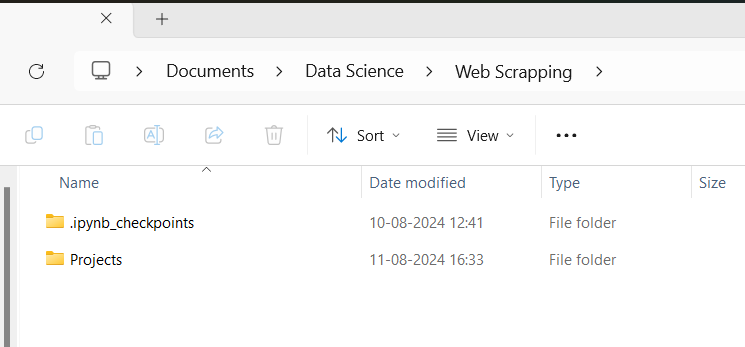

<h5 style = 'color : red'> Status after running the function</h5>

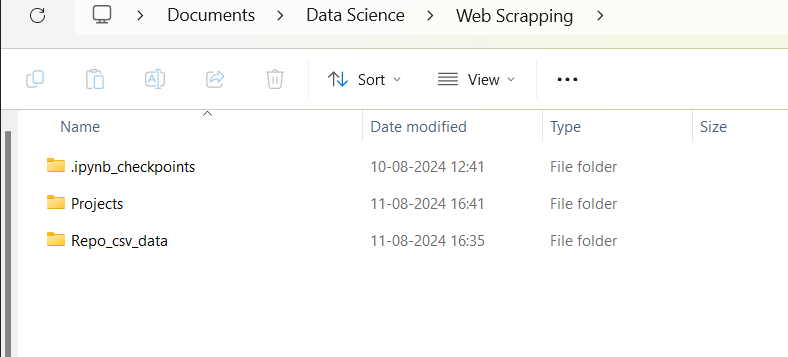

<h5 style = 'color : red'>Contents inside the destination folder</h5>

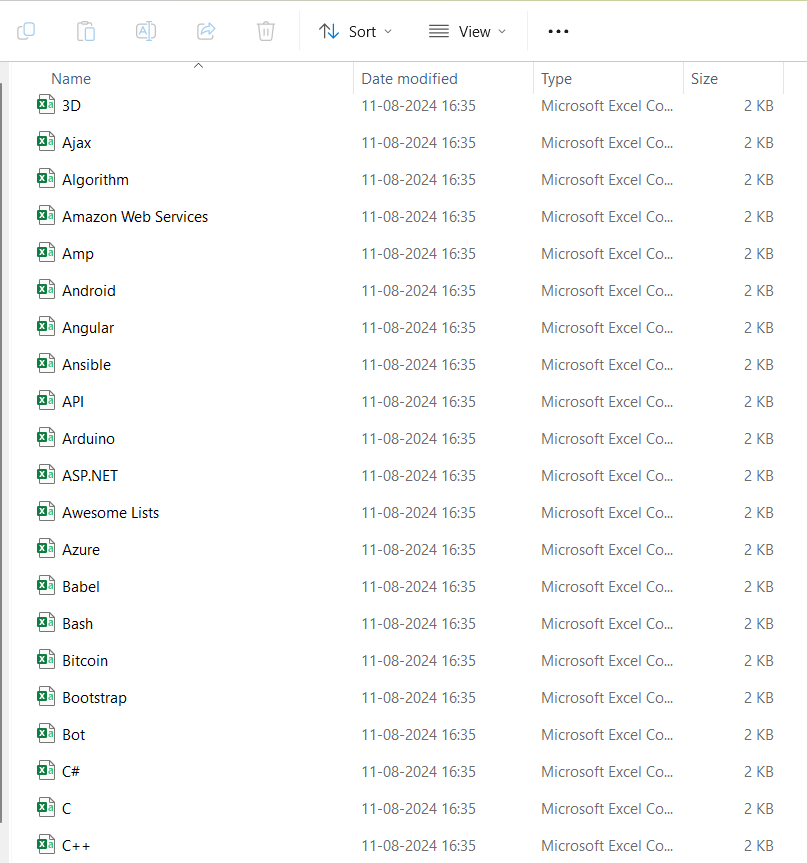

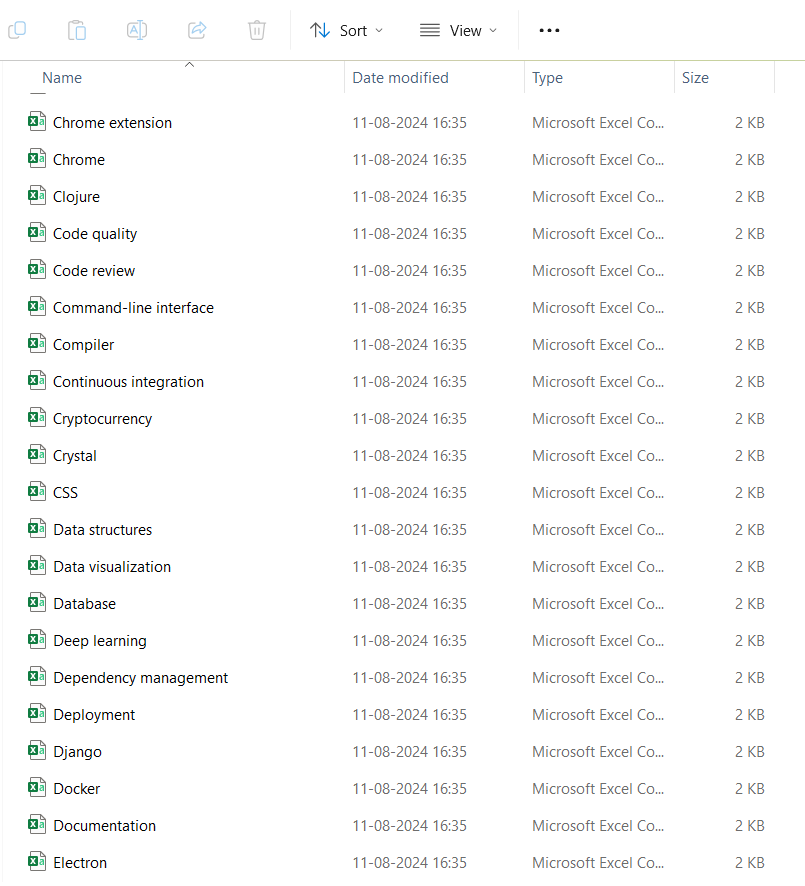

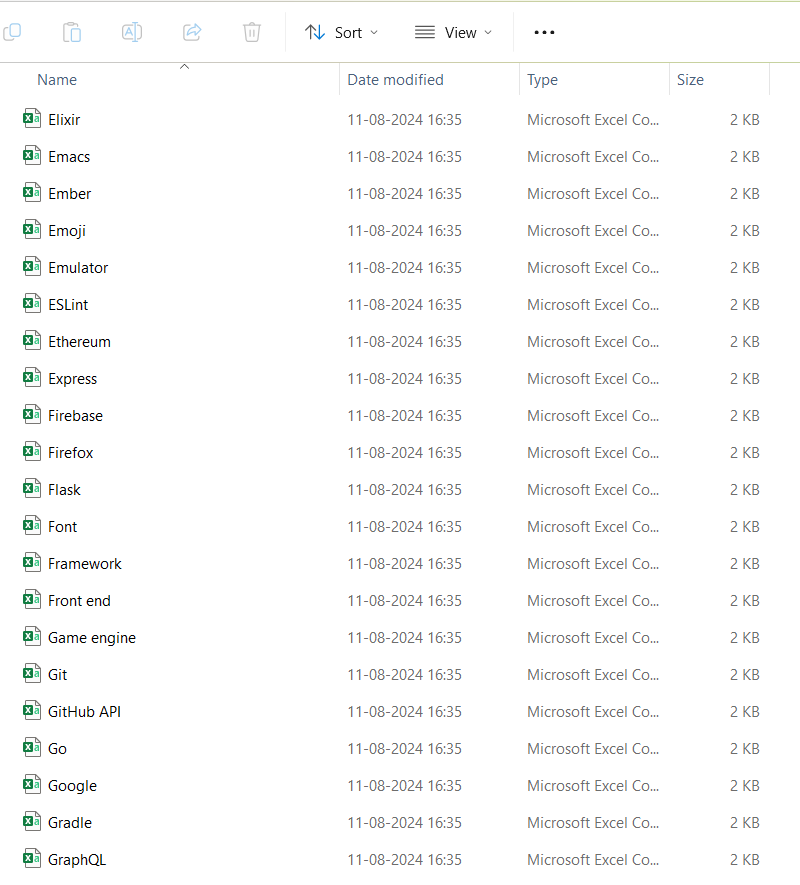

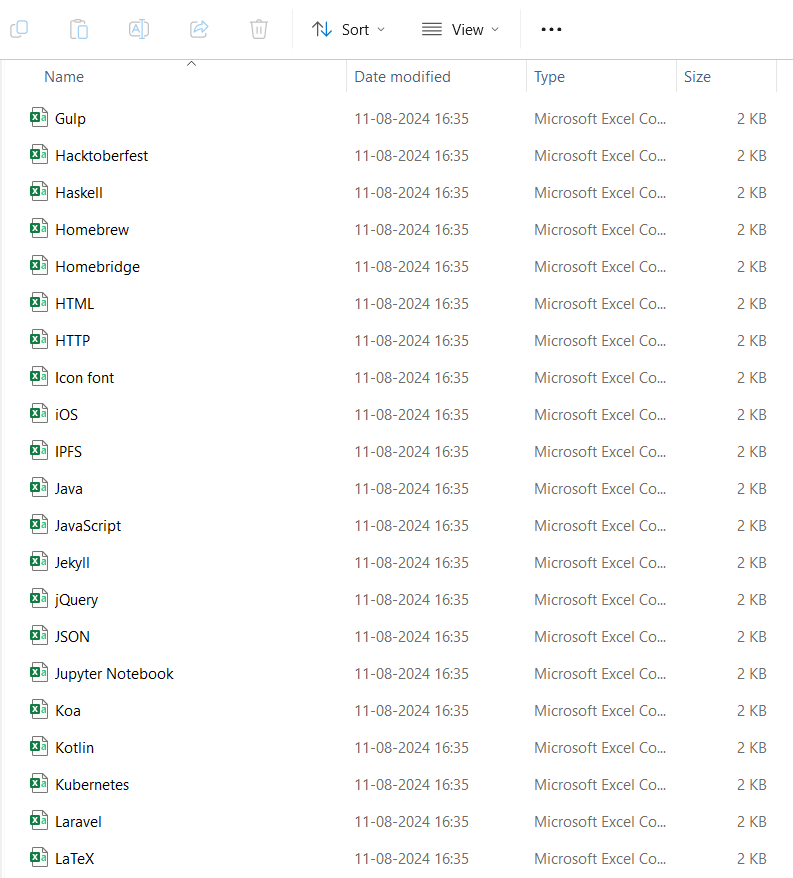

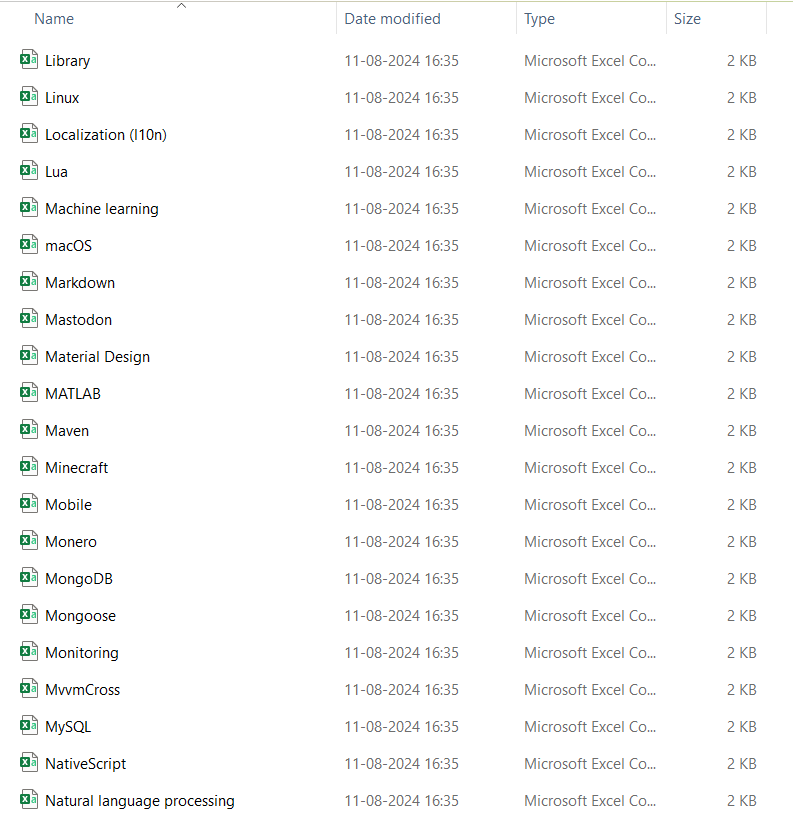

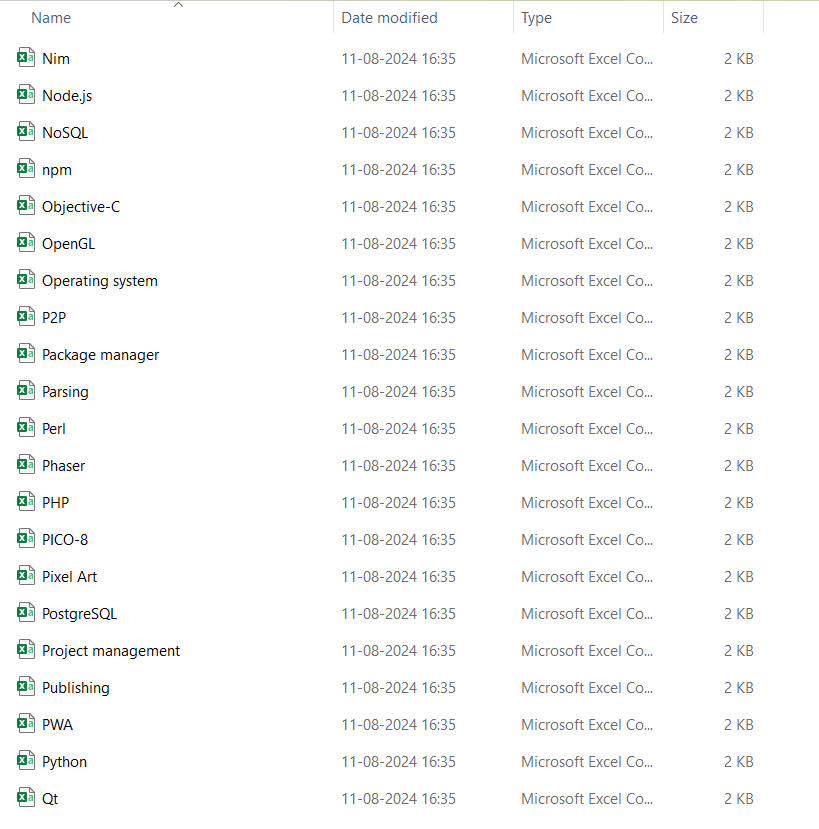

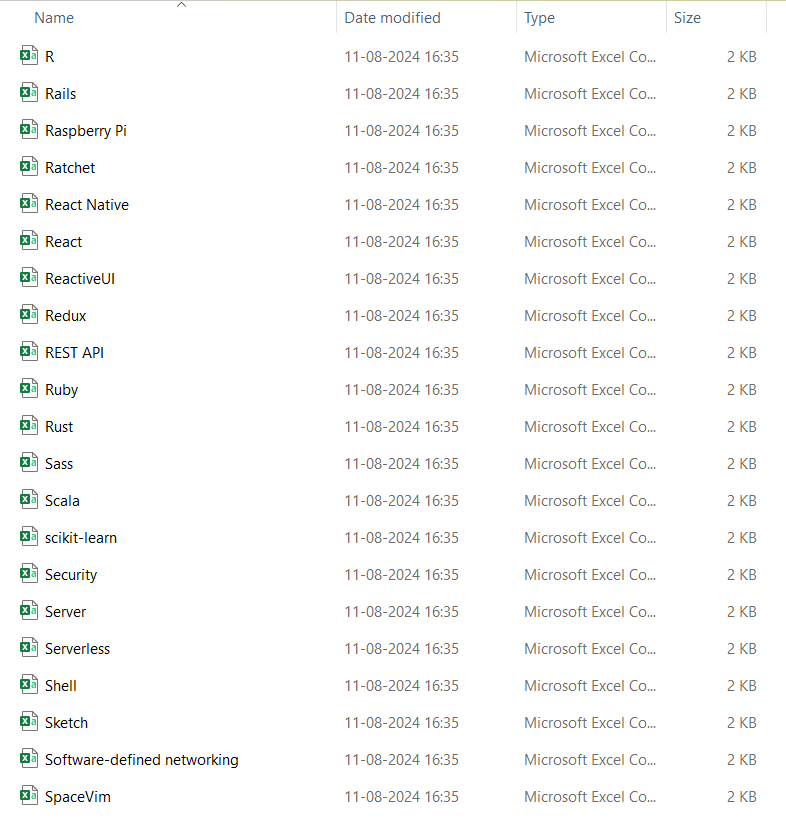

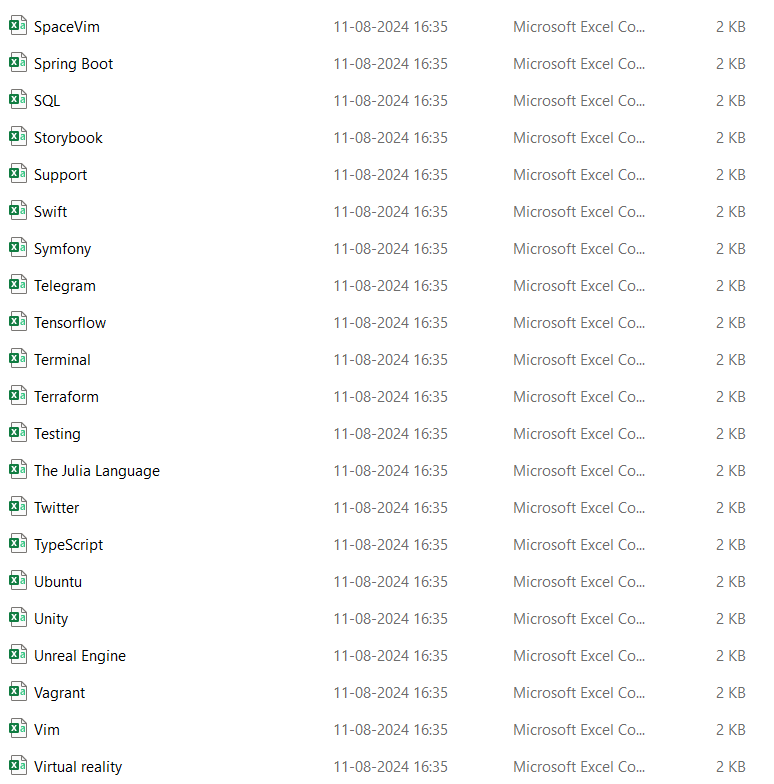

<h5 style = 'color : red'>Contents of one of a File(example - Tensorflow)</h5>

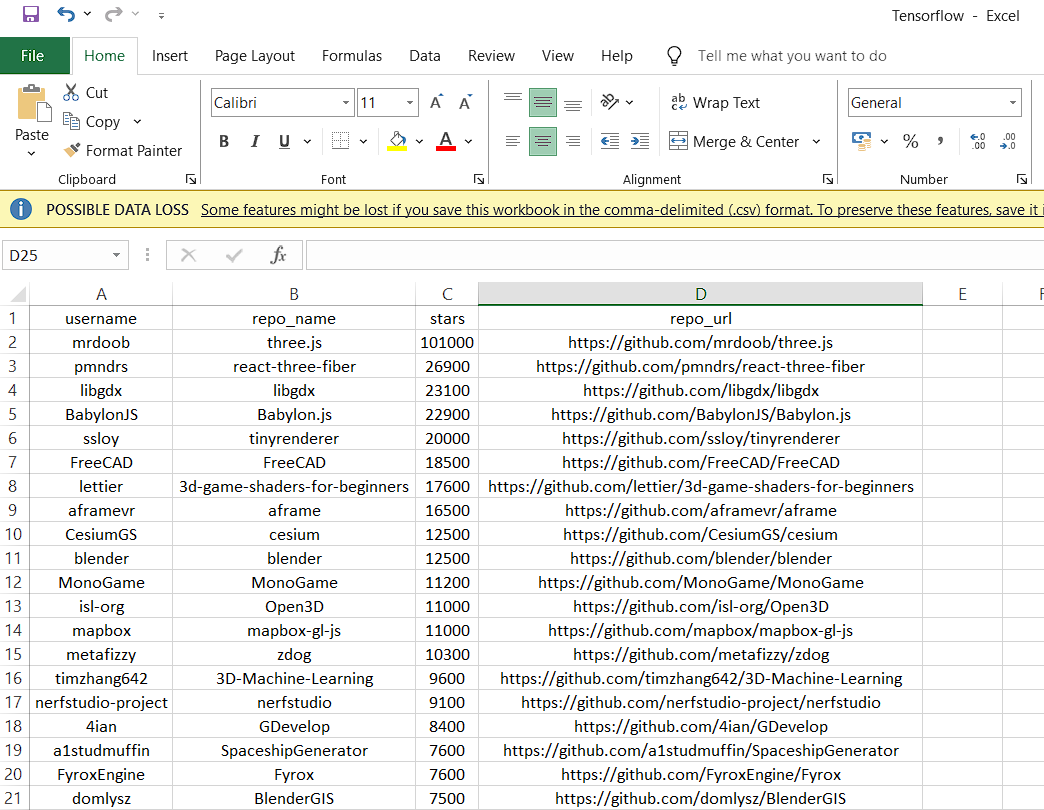

#### Hence, we got the information from the top 20 Repositories from all the topics on github from *https://github.com/topics.*

<h3 style = 'color : red'><u>Summary</u></h3>

* We have scraped or fetched all the topics from the Github Topics page in the Explore section of Github home page.
* We downloaded the pages using **requests** library and parsed them using **Beautiful Soup** python library.
* All the topics from the page(**https://github.com/topics**) were scraped first.
* After that, all the Top 20 Repositories from each page was scraped.
* The information that was fetched from the Repositories was -->
  
    * Repository Name.
    * Username.
    * Number of stars given to each Repository.
    * Repository URL.

* We also created a function to get all this data into a **pandas dataframe** and exports that into csv format.
* We finally created a main function which when called, exports the top Repositories from each topic into csv.
* The files were saved into a new folder which we created by the help of **os** module.

<h3 style = 'color : red'><u>Links Used</u></h3>

* https://github.com/topics
* https://en.wikipedia.org/wiki/Web_scraping